## Empirical cumulative distribution:

Finding an empirical cumulative distribution is a non-parametric technique that generates an orderd cumulative ranked view of the data. 

We can statistically compared two curves using the eCDFs and applying the Kolmogorov–Smirnov test (KS test), which is a non_parametric test of equality of two continuous distributions

[1] 0.47

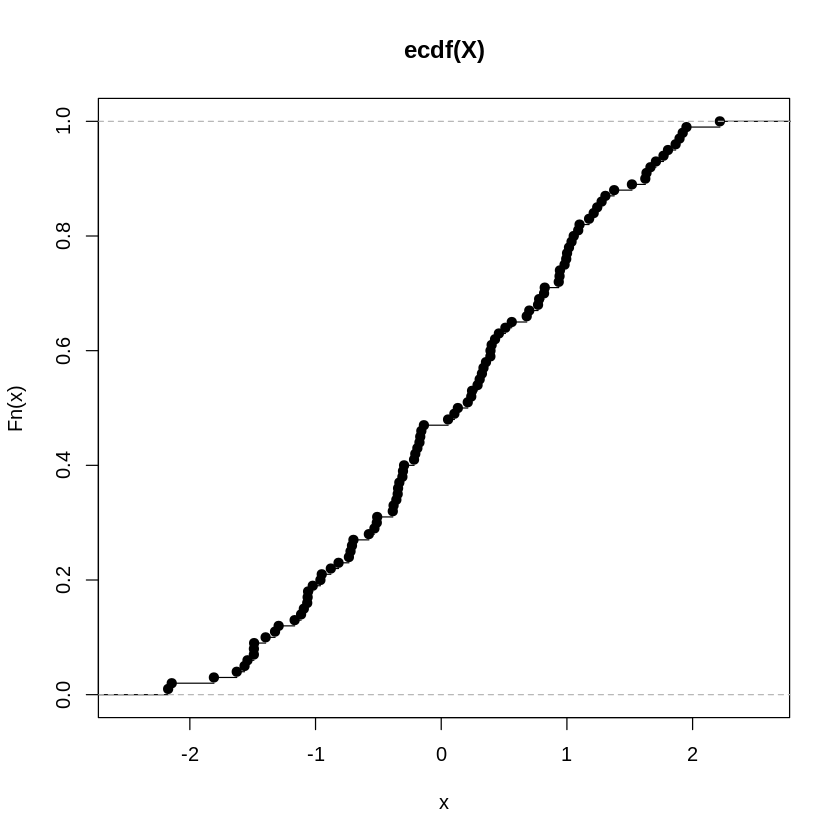

In [1]:
X = rnorm(100)
P = ecdf(X)
P(0.0)
plot(P)

In [2]:
require(ggplot2)

Loading required package: ggplot2


In [3]:
# simulate two distributions - your data goes here!
sample1 <- rnorm(10000, 10, 5)
sample2 <- rnorm(10000, 1, 5)
group <- c(rep("sample1", length(sample1)), rep("sample2", length(sample2)))
dat <- data.frame(KSD = c(sample1,sample2), group = group)
# create ECDF of data
cdf1 <- ecdf(sample1) 
cdf2 <- ecdf(sample2) 
# find min and max statistics to draw line between points of greatest distance
minMax <- seq(min(sample1, sample2), max(sample1, sample2), length.out=length(sample1)) 
x0 <- minMax[which( abs(cdf1(minMax) - cdf2(minMax)) == max(abs(cdf1(minMax) - cdf2(minMax))) )] 
y0 <- cdf1(x0) 
y1 <- cdf2(x0) 

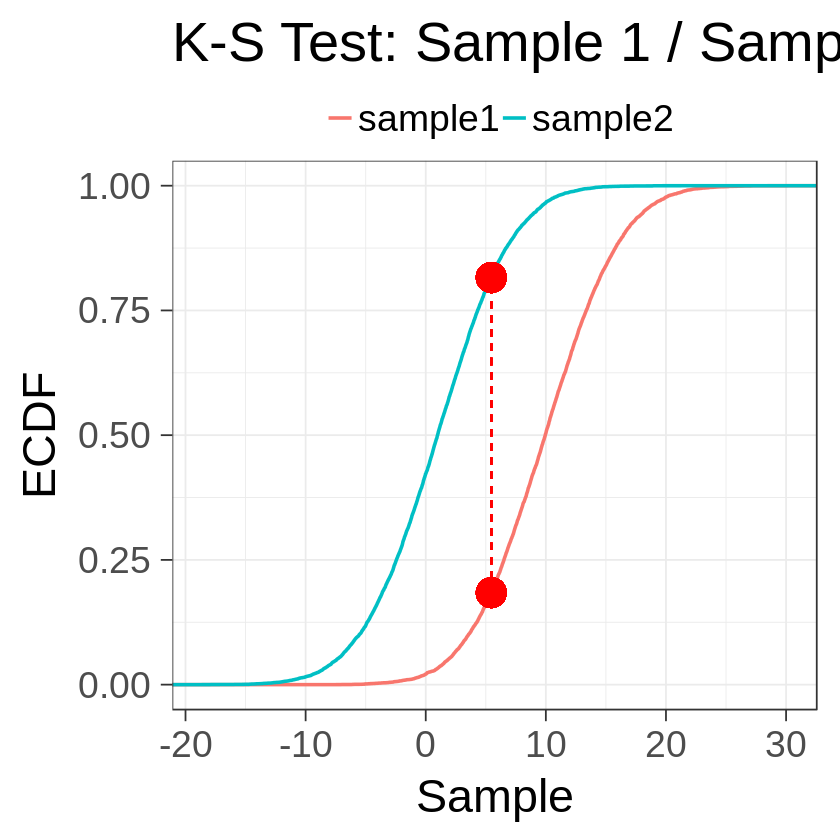

In [4]:
ggplot(dat, aes(x = KSD, group = group, color = group))+
  stat_ecdf(size=1) +
    theme_bw(base_size = 28) +
    theme(legend.position ="top") +
    xlab("Sample") +
    ylab("ECDF") +
    #geom_line(size=1) +
    geom_segment(aes(x = x0[1], y = y0[1], xend = x0[1], yend = y1[1]),
        linetype = "dashed", color = "red") +
    geom_point(aes(x = x0[1] , y= y0[1]), color="red", size=8) +
    geom_point(aes(x = x0[1] , y= y1[1]), color="red", size=8) +
    ggtitle("K-S Test: Sample 1 / Sample 2") +
    theme(legend.title=element_blank())

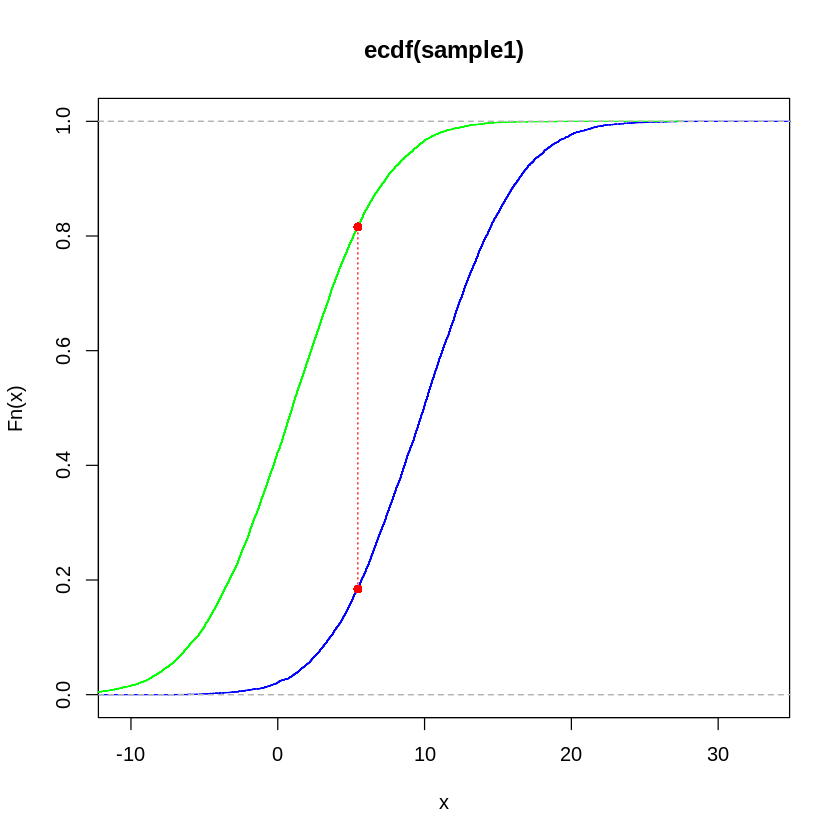

In [5]:
######################### non ggplot example
plot(cdf1, verticals=TRUE, do.points=FALSE, col="blue") 
plot(cdf2, verticals=TRUE, do.points=FALSE, col="green", add=TRUE) 
## alternative, use standard R plot of ecdf 
#plot(f.a, col="blue") 
#lines(f.b, col="green") 

points(c(x0, x0), c(y0, y1), pch=16, col="red") 
segments(x0, y0, x0, y1, col="red", lty="dotted") 

In [6]:
ks.test(sample1, sample2)


	Two-sample Kolmogorov-Smirnov test

data:  sample1 and sample2
D = 0.6317, p-value < 2.2e-16
alternative hypothesis: two-sided
